In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/spiraloo/Intro-To-ML-GDSC-IITK.git

Cloning into 'Intro-To-ML-GDSC-IITK'...
remote: Enumerating objects: 740, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 740 (delta 7), reused 3 (delta 3), pack-reused 729
Receiving objects: 100% (740/740), 64.35 MiB | 29.09 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
%cd Intro-To-ML-GDSC-IITK

/content/Intro-To-ML-GDSC-IITK


In [4]:
import os
dataset_path = '/content/Intro-To-ML-GDSC-IITK/Week4'
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

In [5]:
from PIL import Image
dogs = []
cats = []
dogs_path = train_path+'/dogs'
cats_path = train_path+'/cats'
for filename in os.listdir(dogs_path):
  if filename.endswith('.jpg') or filename.endswith('.png'):
     dogs_img_path = os.path.join(dogs_path, filename)
     img = Image.open(dogs_img_path)
     dogs.append(img)

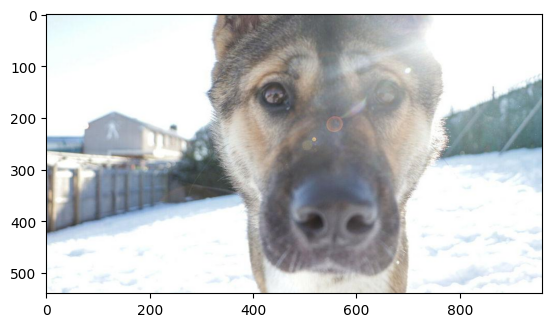

In [6]:
plt.imshow(dogs[0])

In [7]:
import numpy as np
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Assuming you have two lists: dogs_list and cats_list containing image data

# Example:
# dogs_list = [dog_image1, dog_image2, ..., dog_image_n]
# cats_list = [cat_image1, cat_image2, ..., cat_image_m]

# Combine the lists and create labels
images_list = dogs+ cats
labels = [1] * len(dogs) + [0] * len(cats)  # 1 for dogs, 0 for cats

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_list, labels, test_size=0.2, random_state=42)

# Preprocess the images and convert them to NumPy arrays
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1./255)

batch_size = 32

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    '/content/Intro-To-ML-GDSC-IITK/Week4',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'  # Assuming it's a binary classification (cats and dogs)
)


Found 697 images belonging to 2 classes.


Epoch 1/40
21/21 [==============================] - 46s 2s/step - loss: 0.7036 - accuracy: 0.7098
Epoch 2/40
21/21 [==============================] - 35s 2s/step - loss: 0.5237 - accuracy: 0.8000
Epoch 3/40
21/21 [==============================] - 35s 2s/step - loss: 0.5061 - accuracy: 0.8045
Epoch 4/40
21/21 [==============================] - 34s 2s/step - loss: 0.5207 - accuracy: 0.7940
Epoch 5/40
21/21 [==============================] - 35s 2s/step - loss: 0.5038 - accuracy: 0.8015
Epoch 6/40
21/21 [==============================] - 34s 2s/step - loss: 0.4992 - accuracy: 0.7985
Epoch 7/40
21/21 [==============================] - 34s 2s/step - loss: 0.5031 - accuracy: 0.8015
Epoch 8/40
21/21 [==============================] - 34s 2s/step - loss: 0.5029 - accuracy: 0.8000
Epoch 9/40
21/21 [==============================] - 33s 2s/step - loss: 0.5083 - accuracy: 0.8000
Epoch 10/40
21/21 [==============================] - 34s 2s/step - loss: 0.4871 - accuracy: 0.8000
Epoch 11/40
21/21 [

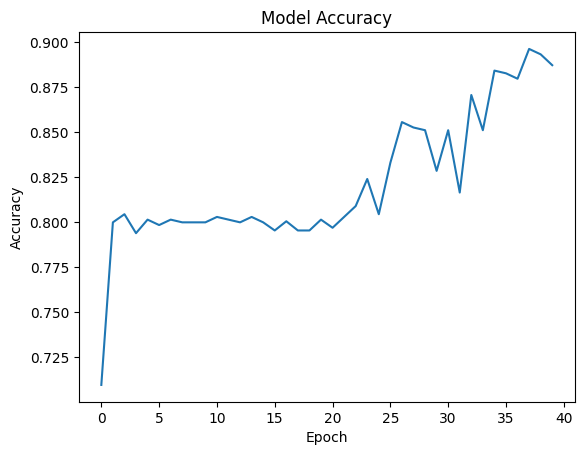

In [17]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=40# You can adjust the number of epochs based on your needs
)

# Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {test_acc}')
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, f1_score
test_dataset = test.flow_from_directory("/content/Intro-To-ML-GDSC-IITK/Week4",
                                          target_size=(150,150),
                                          batch_size =16,
                                          class_mode = 'binary',
                                          color_mode='rgb',  # Assuming your model was trained on RGB images
                                          shuffle=False,  # Important to keep the order of predictions consistent with true labels
                                        )
predictions=model.predict(test_dataset)
predicted_labels = (predictions > 0.38).astype(int).flatten()
true_labels = test_dataset.classes
accuracy = accuracy_score(true_labels, predicted_labels)
f1=f1_score(true_labels,predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'f1_score: {f1 * 100:.2f}%')

Found 697 images belonging to 2 classes.
44/44 [==============================] - 12s 270ms/step
Accuracy: 92.54%
f1_score: 95.51%
